# Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
 test = pd.read_csv('C:/Users/Lucky Kulshrestha/Downloads/test_mSzZ8RL.csv') 
train = pd.read_csv('C:/Users/Lucky Kulshrestha/Downloads/train_s3TEQDk.csv')

In [3]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [4]:
test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [5]:
test.shape

(105312, 10)

In [6]:
train.shape

(245725, 11)

In [7]:
train.isna()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
245720,False,False,False,False,False,False,False,True,False,False,False
245721,False,False,False,False,False,False,False,False,False,False,False
245722,False,False,False,False,False,False,False,False,False,False,False
245723,False,False,False,False,False,False,False,False,False,False,False


In [8]:
train.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
y_train=train.dropna()#drop null value in training data 

In [10]:
y_train.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [11]:
test.isna().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [12]:
x_test=test.fillna(method='ffill')#forward filling
x_test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,Yes,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [13]:
x_test.isna().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [14]:
y_train.set_index("ID", inplace = True)

In [15]:
x_test.set_index("ID", inplace =True)

In [16]:
lead_1 = y_train[y_train['Is_Lead']==True]#Interested people
len(lead_1)

33313

In [17]:
lead_0 = y_train[y_train['Is_Lead']==False]# Not Interested people
len(lead_0)

183087

In [18]:
#We can see that training data have 'lead_0' approx 5 times more than 'lead_1'.
frames= [y_train[y_train['Is_Lead']==False].iloc[:40000, : ] , y_train[y_train['Is_Lead']==True]]
frames

[          Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
 ID                                                                       
 NNVBBKZB  Female   73       RG268          Other           X3       43   
 IDD62UNG  Female   30       RG277       Salaried           X1       32   
 HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
 BF3NC7KV    Male   34       RG270       Salaried           X1       19   
 TEASRWXV  Female   30       RG282       Salaried           X1       33   
 ...          ...  ...         ...            ...          ...      ...   
 BN3B2JKY  Female   26       RG263          Other           X1       15   
 VBAQOMN7  Female   27       RG259          Other           X1       13   
 K6FMOMVN    Male   29       RG284          Other           X1       27   
 PXXDB6Q2  Female   36       RG280       Salaried           X1       25   
 XVTEUEC5  Female   29       RG279          Other           X1       26   
 
          Credit_Produc

In [19]:
balance_y_train=pd.concat(frames)
balance_y_train #balancing data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
3HPHK52G,Male,51,RG283,Self_Employed,X1,91,No,766548,No,1
NUTSCAQY,Female,52,RG273,Other,X3,74,Yes,1122023,Yes,1
DTQJBXK6,Male,43,RG257,Salaried,X1,50,No,551203,Yes,1


In [20]:
x_train = pd.DataFrame(balance_y_train['Is_Lead'])
balance_y_train = balance_y_train.drop(columns="Is_Lead")
# dividing input and output features

In [21]:
balance_y_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
3HPHK52G,Male,51,RG283,Self_Employed,X1,91,No,766548,No
NUTSCAQY,Female,52,RG273,Other,X3,74,Yes,1122023,Yes
DTQJBXK6,Male,43,RG257,Salaried,X1,50,No,551203,Yes


In [22]:
x_train['Is_Lead'].unique()

array([0, 1], dtype=int64)

In [23]:
#encoding of training data 
from sklearn import preprocessing
s=preprocessing.LabelEncoder()
for column_name in balance_y_train.columns:
    if balance_y_train[column_name].dtype == object:
        balance_y_train[column_name] = s.fit_transform(balance_y_train[column_name])
    else:
        pass

In [24]:
#encoding of testing data
for column_name in x_test.columns:
    if x_test[column_name].dtype == object:
        x_test[column_name] = s.fit_transform(x_test[column_name])
    else:
        pass     

In [25]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
Y_train, Y_test, X_train, X_test = train_test_split(balance_y_train, x_train, test_size=0.33)

# classification model


In [26]:
#Naive bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb=GaussianNB()
nb.fit(Y_train,X_train)
predicted_X = nb.predict(Y_test)
acc=accuracy_score(X_test, predicted_X)*100
acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


64.524262213772

In [28]:
y_score1=nb.predict_proba(Y_test)[:,1]#predicting target values for test dataset we store predicted class and use it to get the roc_auc_score
y_score1

array([0.72874245, 0.40964288, 0.35248433, ..., 0.62347387, 0.35498891,
       0.39222041])

In [39]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(X_test, y_score1)
roc_score 

0.6734641486924302

In [30]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Y_train,X_train)
predicted_X = lr.predict(Y_test)
acc_lr = accuracy_score(X_test, predicted_X)*100
acc_lr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


54.69951227577086

In [31]:
y_score2=lr.predict_proba(Y_test)[:,1]
y_score2

array([0.49053909, 0.46821677, 0.47776795, ..., 0.48084833, 0.49251806,
       0.46666155])

In [40]:
roc_score2 = roc_auc_score(X_test, y_score2)
roc_score2 

0.451100454315306

In [32]:
#DecisionTreeClassifier 

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(Y_train, X_train)
predicted_X = dtree.predict(Y_test)
acc_dtree = accuracy_score(X_test, predicted_X)*100
acc_dtree

63.676944697032326

In [33]:
y_score3=dtree.predict_proba(Y_test)[:,1]
y_score3

array([0., 0., 1., ..., 0., 1., 0.])

In [41]:
roc_score3 = roc_auc_score(X_test, y_score3)
roc_score3 

0.6338769223047469

In [34]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(Y_train, X_train)
predicted_X = rfm.predict(Y_test)
acc_rfm = accuracy_score(X_test, predicted_X)*100
acc_rfm

<ipython-input-34-d46b0683fcc0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfm.fit(Y_train, X_train)


72.75770852277425

In [65]:
y_score4=rfm.predict_proba(Y_test)[:,1]
y_score4

array([0.58, 0.21, 0.57, ..., 0.82, 0.48, 0.24])

In [42]:
roc_score4 = roc_auc_score(X_test, y_score4)
roc_score4 

0.7787901400561923

Text(0, 0.5, 'Classifier Names')

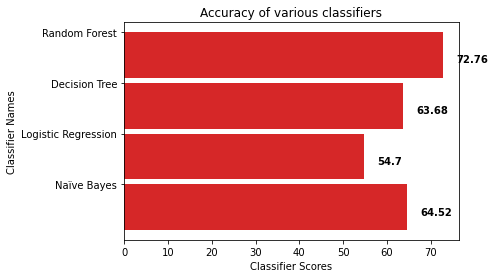

In [36]:
classifier_names = np.array(['Naïve Bayes','Logistic Regression', 'Decision Tree', 'Random Forest'])

classifier_scores = np.array([acc, acc_lr,acc_dtree, acc_rfm]).round(2)

# Plotting the bar graph of accuracy for every classifier

fig, ax = plt.subplots()    
width = 0.9 # the width of the bars 
loc = np.arange(len(classifier_scores))  # the x locations for the groups
for i, v in enumerate(classifier_scores):
    ax.text(v + 3, i - .15, str(v), color='black', fontweight='bold')
ax.barh(loc, classifier_scores, width, color="tab:red")
ax.set_yticks(loc+width/2)
ax.set_yticklabels(classifier_names, minor=False)
plt.title('Accuracy of various classifiers')
plt.xlabel('Classifier Scores')
plt.ylabel('Classifier Names')  

Text(0, 0.5, 'Classifier Names')

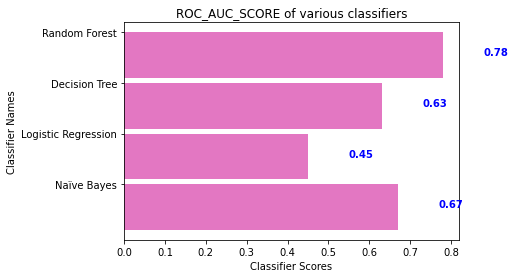

In [55]:
classifier_names = np.array(['Naïve Bayes','Logistic Regression', 'Decision Tree', 'Random Forest'])

classifier_scores = np.array([roc_score ,roc_score2,roc_score3,roc_score4]).round(2)

# Plotting the bar graph of roc_auc for every classifier

fig, ax = plt.subplots()    
width = 0.9 # the width of the bars 
loc = np.arange(len(classifier_scores))  # the x locations for the groups
for i, v in enumerate(classifier_scores):
    ax.text(v + 0.1, i - .01, str(v), color='blue', fontweight='bold')
ax.barh(loc, classifier_scores, width, color="tab:pink")
ax.set_yticks(loc+width/2)
ax.set_yticklabels(classifier_names, minor=False)
plt.title('ROC_AUC_SCORE of various classifiers')
plt.xlabel('Classifier Scores')
plt.ylabel('Classifier Names')  

In [37]:
from sklearn.metrics import roc_curve
fpr1,tpr1,thre1=roc_curve(X_test,y_score1)
fpr2,tpr2,thre2=roc_curve(X_test,y_score2)
fpr3,tpr3,thre3=roc_curve(X_test,y_score3)
fpr4,tpr4,thre4=roc_curve(X_test,y_score4)

In [68]:
#print(fpr1,tpr1,thre1)

In [69]:
#print(fpr2,tpr2,thre2)

In [70]:
#print(fpr3,tpr3,thre3)

In [71]:
#print(fpr4,tpr4,thre4)

In [67]:
predictions =rfm.predict(x_test)
sample_submission = pd.read_csv('C:/Users/Lucky Kulshrestha/Downloads/sample_submission_eyYijxG.csv')
sample_submission['Is_Lead'] = predictions
sample_submission.to_csv(f'submission.csv',index=False)